In [1]:
from config import RAW_CARD_DIR
import pandas as pd
import os

2025-07-17 13:38:14.586 | INFO     | config:<module>:9 - PROJ_ROOT path is: /home/arys/projects/unsupervised_ml_experimentation


In [2]:
data = pd.read_csv(os.path.join(RAW_CARD_DIR, 'cards.csv'))
data

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train
...,...,...,...,...,...
8150,52,valid/two of spades/1.jpg,two of spades,two,valid
8151,52,valid/two of spades/2.jpg,two of spades,two,valid
8152,52,valid/two of spades/3.jpg,two of spades,two,valid
8153,52,valid/two of spades/4.jpg,two of spades,two,valid


In [3]:
data_filepath = RAW_CARD_DIR / data['filepaths']

In [4]:
data_filepath

0       /home/arys/projects/unsupervised_ml_experiment...
1       /home/arys/projects/unsupervised_ml_experiment...
2       /home/arys/projects/unsupervised_ml_experiment...
3       /home/arys/projects/unsupervised_ml_experiment...
4       /home/arys/projects/unsupervised_ml_experiment...
                              ...                        
8150    /home/arys/projects/unsupervised_ml_experiment...
8151    /home/arys/projects/unsupervised_ml_experiment...
8152    /home/arys/projects/unsupervised_ml_experiment...
8153    /home/arys/projects/unsupervised_ml_experiment...
8154    /home/arys/projects/unsupervised_ml_experiment...
Name: filepaths, Length: 8155, dtype: object

In [5]:
from PIL import Image
import numpy as np

flat_images = []
images = []
target_size = (64, 64)

for path in data_filepath:
    if not os.path.exists(path):
        print(f"[WARNING] File not found: {path}")
        continue

    try:
        img = Image.open(path).convert('RGB')
        images.append(img)# Assure 3 canaux
        img = img.resize(target_size)
        img_array = np.array(img)# Shape: (H, W, 3)

        flat_array = img_array.flatten() # Shape: (H*W*3,)
        flat_images.append(flat_array)
    except Exception as e:
        print(f"[ERROR] Could not process {path}: {e}")

reshaped_images = np.array(flat_images)  # Shape: (n_images, H*W*3)

[WARNING] File not found: /home/arys/projects/unsupervised_ml_experimentation/data/raw/archive/train/ace of clubs/output


In [6]:
normalized_reshaped_img = reshaped_images / 255.0

In [7]:
from matplotlib import pyplot as plt


def show_flattened_image(flat_array_in, image_shape=(64, 64, 3), show=False, normalize=False):
    """
    flat_array : vecteur 1D (par exemple narr[1])
    image_shape : tuple (H, W, C) pour reconstruire l’image

    Affiche l’image.
    """

    flat_array = flat_array_in * 255.0 if normalize else flat_array_in

    expected_size = np.prod(image_shape)
    if flat_array.shape[0] != expected_size:
        raise ValueError(f"Vector size {flat_array.shape[0]} does not match expected image shape {image_shape}.")

    # Reconstruction de l'image
    img = flat_array.reshape(image_shape)
    img = np.clip(img, 0, 255).astype(np.uint8)  # au cas où il y ait des valeurs hors de [0,255]

    if show:
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    return img

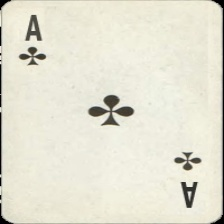

In [8]:
images[100]

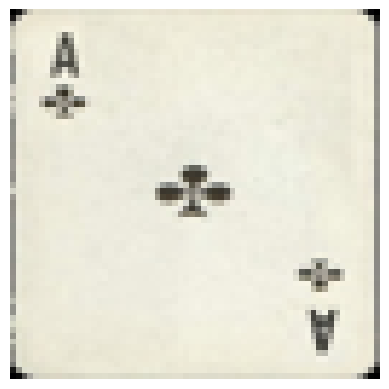

array([[[  0,   0,   0],
        [ 20,  19,  18],
        [122, 119, 111],
        ...,
        [ 92,  91,  85],
        [  8,   8,   9],
        [  0,   0,   0]],

       [[ 29,  26,  25],
        [167, 163, 153],
        [238, 232, 214],
        ...,
        [236, 235, 216],
        [144, 144, 134],
        [ 15,  15,  13]],

       [[144, 141, 133],
        [236, 232, 215],
        [233, 228, 206],
        ...,
        [238, 235, 212],
        [233, 232, 215],
        [114, 112, 109]],

       ...,

       [[118, 118, 113],
        [226, 227, 210],
        [223, 222, 200],
        ...,
        [239, 234, 215],
        [229, 226, 211],
        [ 95,  93,  88]],

       [[ 22,  22,  20],
        [146, 146, 136],
        [221, 222, 206],
        ...,
        [224, 222, 207],
        [131, 129, 120],
        [ 14,  14,  12]],

       [[  0,   0,   2],
        [  8,   8,   8],
        [ 87,  86,  83],
        ...,
        [ 78,  78,  73],
        [  2,   3,   2],
        [  0,   0,   0]]

In [9]:
show_flattened_image(normalized_reshaped_img[100], show=True, normalize=True)

In [10]:
from config import PROCESSED_DATA_DIR

np.save(PROCESSED_DATA_DIR / "card_exploration.npy", normalized_reshaped_img)

In [3]:
import numpy as np
from config import PROCESSED_DATA_DIR
crds = np.load(PROCESSED_DATA_DIR / "card_exploration.npy")

2025-07-18 11:47:39.758 | INFO     | config:<module>:9 - PROJ_ROOT path is: /home/arys/projects/unsupervised_ml_experimentation


In [5]:
crds.shape

(8154, 12288)

In [11]:
dataloadr = DataLoader(dataset, batch_size=64, shuffle=True)